## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [93]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [100]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [101]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag ="\n"

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [103]:
import pandas as pd
arrange_data=[]
for line in data:
    
     
    line = line.replace('\t',' ').split(' ')
    arrange_data.append(line)
pd.set_option('max_colwidth',200)  
df = pd.DataFrame(arrange_data)
df.head(6)

,0,1,2,3,4,5,6,7,8,9
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_21e993670c.jpg,None,None,None,None,None,None,None,None
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg,None,None,None,None,None,None,None,None
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg,None,None,None,None,None,None,None,None
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg,None,None,None,None,None,None,None,None
4,n00015388_355,http://img100.imageshack.us/img100/3253/forrest004fs9.jpg,None,None,None,None,None,None,None,None
5,n00015388_373,http://img172.imageshack.us/img172/4606/napo03072en9.jpg,None,None,None,None,None,None,None,None


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

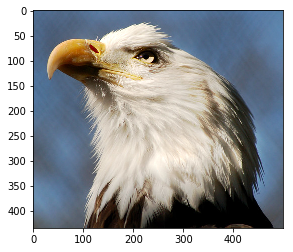

In [150]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
#img_list=np.array(img)
plt.imshow(img)
plt.show()

In [189]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    #global img_list
    
    for i in range(len(url_list)):
        try:
            response = requests.get(url_list[i])
            img = Image.open(BytesIO(response.content))
            
        except:
            print("d")
    
        
             
    
    return img_list

In [190]:
print(df[0:5][1])
print(len(df[0:5][1]))
print(df[0][1])
url=df[0:5][1].values
print(url[0])

0      http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
1    http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
2        http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
3    http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
4        http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Name: 1, dtype: object
5
n00015388_238
http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


d
Total images that we got: 375 


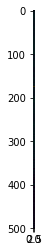

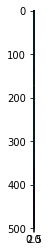

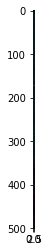

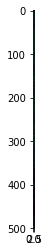

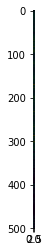

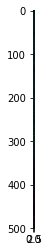

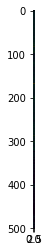

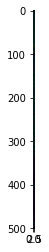

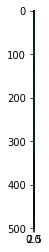

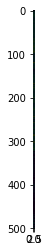

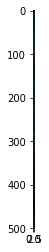

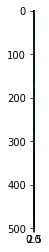

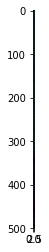

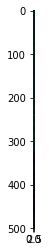

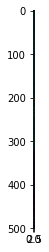

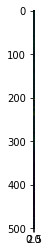

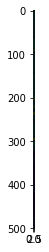

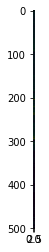

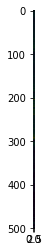

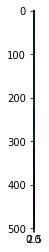

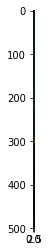

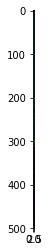

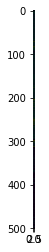

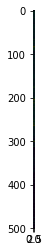

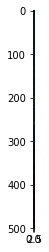

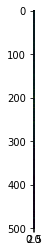

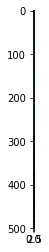

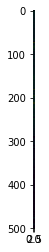

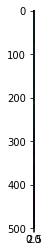

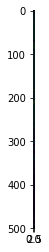

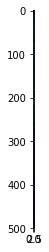

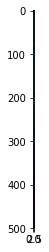

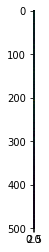

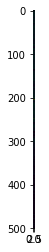

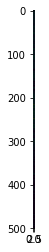

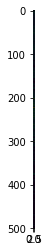

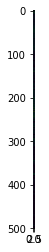

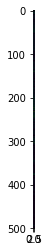

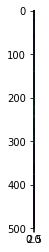

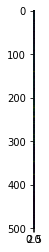

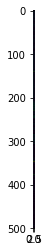

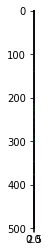

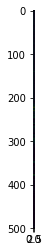

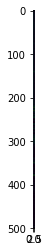

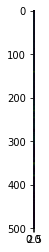

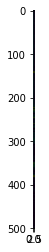

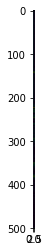

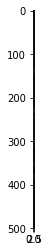

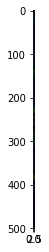

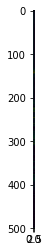

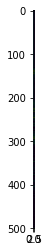

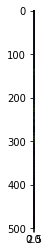

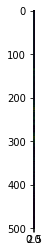

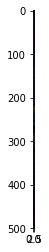

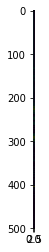

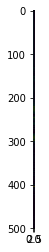

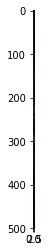

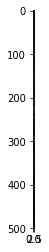

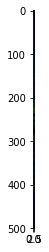

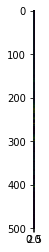

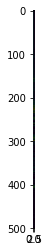

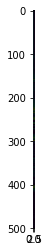

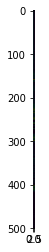

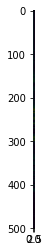

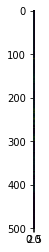

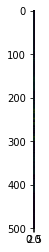

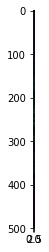

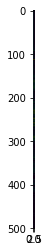

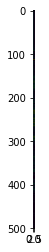

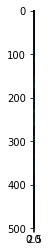

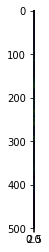

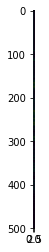

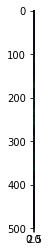

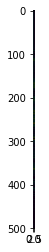

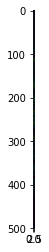

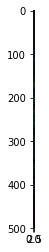

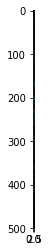

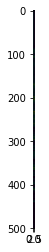

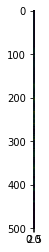

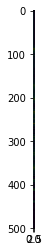

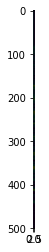

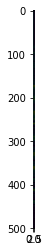

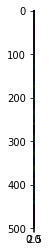

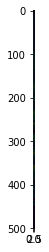

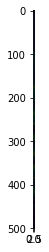

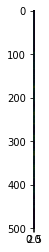

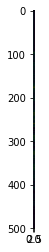

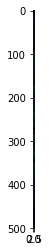

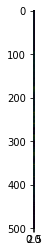

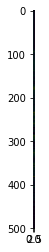

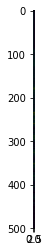

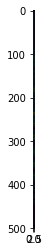

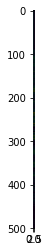

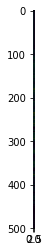

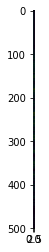

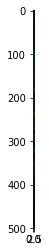

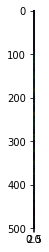

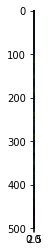

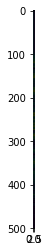

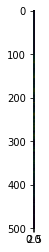

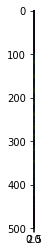

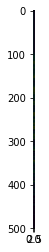

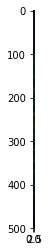

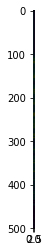

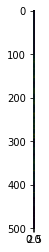

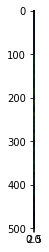

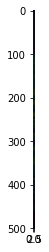

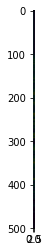

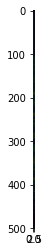

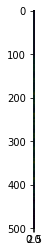

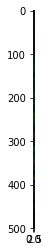

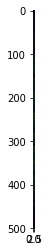

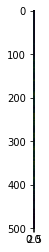

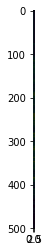

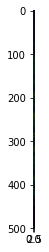

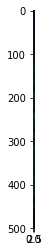

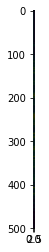

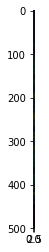

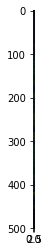

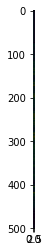

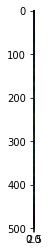

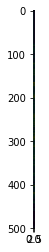

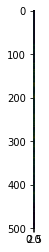

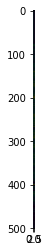

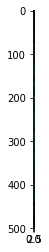

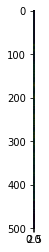

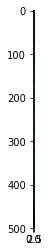

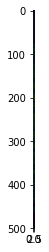

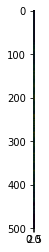

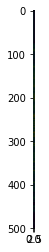

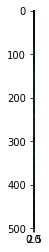

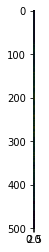

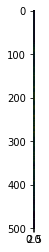

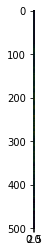

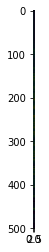

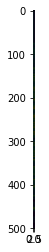

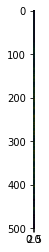

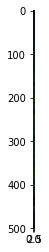

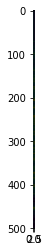

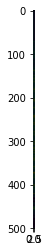

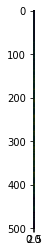

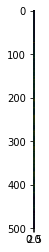

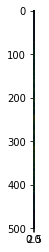

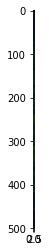

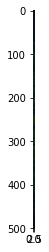

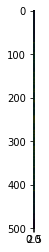

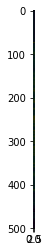

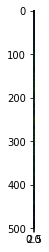

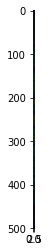

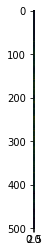

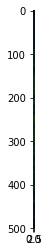

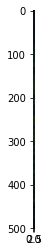

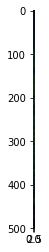

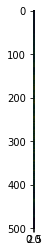

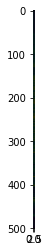

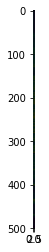

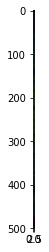

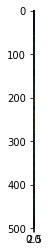

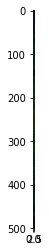

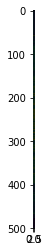

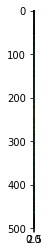

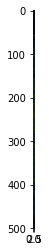

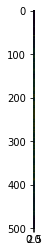

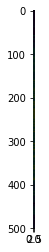

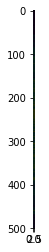

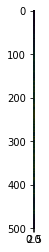

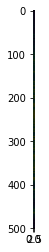

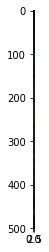

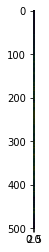

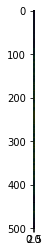

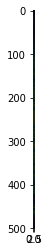

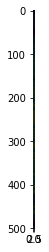

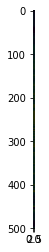

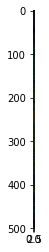

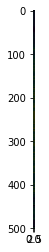

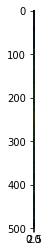

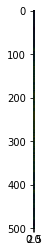

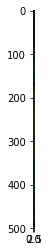

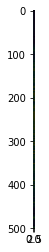

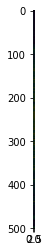

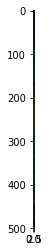

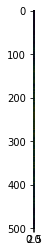

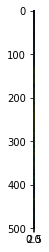

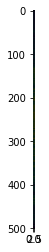

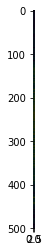

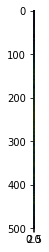

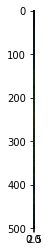

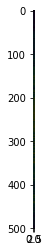

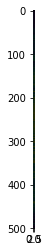

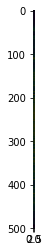

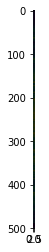

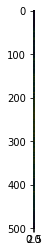

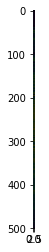

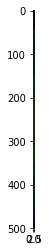

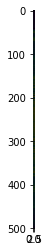

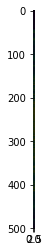

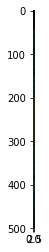

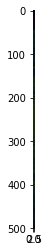

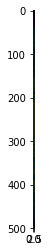

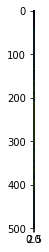

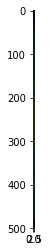

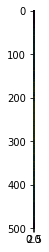

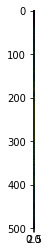

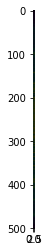

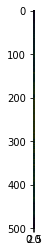

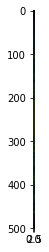

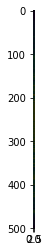

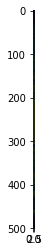

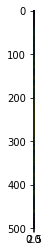

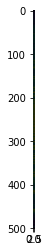

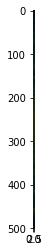

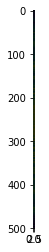

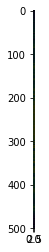

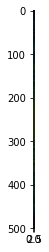

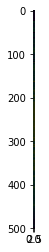

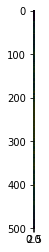

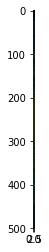

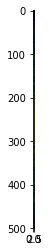

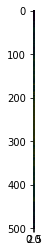

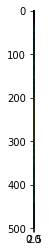

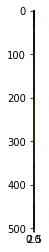

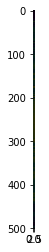

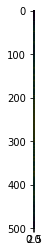

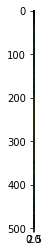

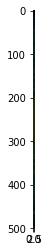

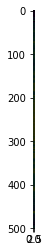

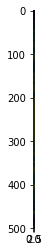

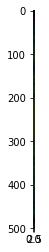

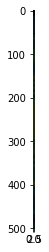

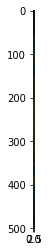

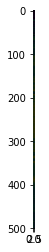

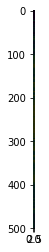

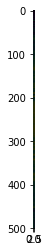

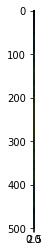

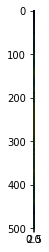

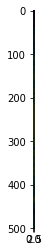

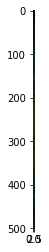

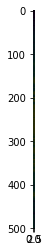

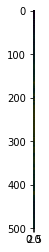

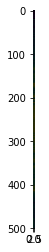

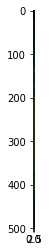

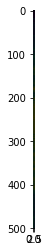

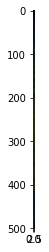

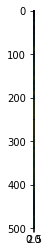

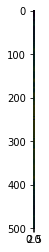

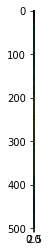

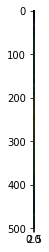

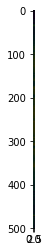

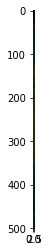

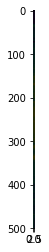

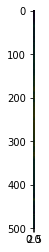

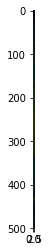

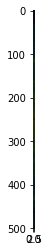

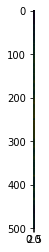

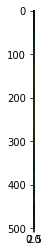

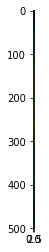

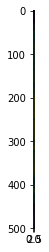

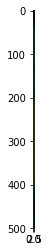

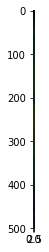

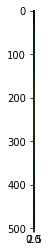

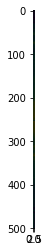

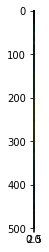

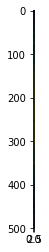

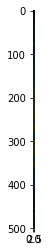

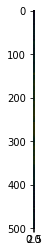

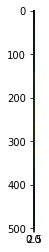

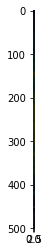

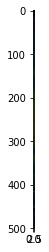

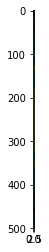

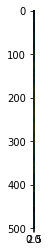

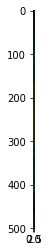

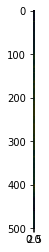

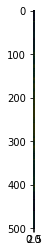

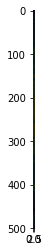

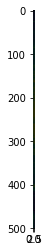

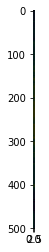

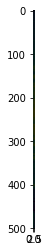

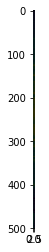

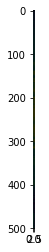

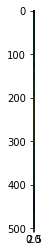

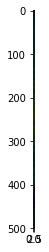

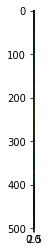

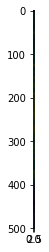

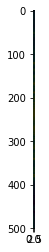

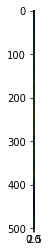

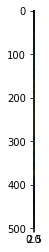

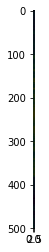

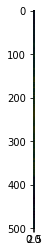

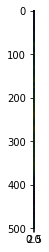

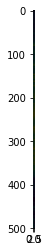

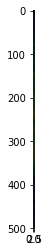

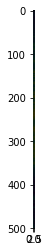

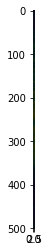

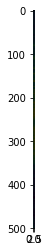

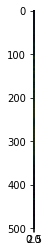

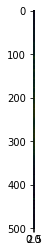

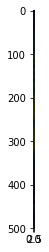

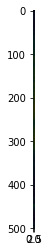

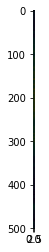

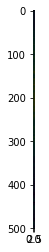

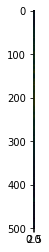

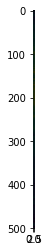

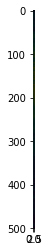

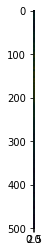

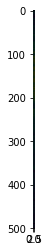

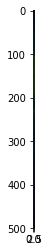

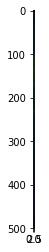

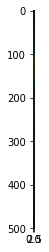

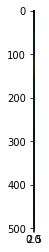

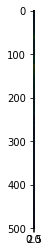

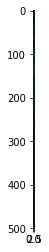

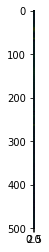

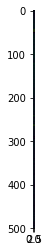

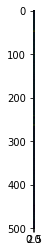

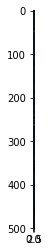

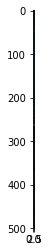

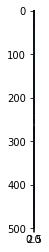

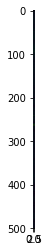

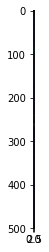

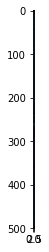

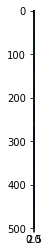

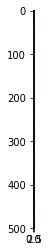

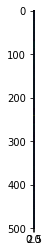

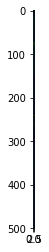

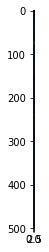

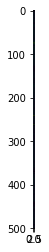

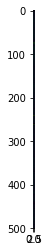

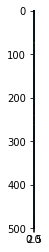

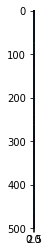

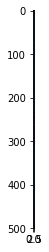

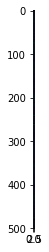

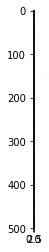

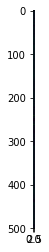

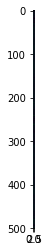

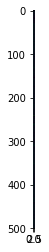

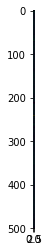

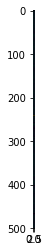

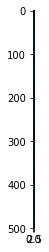

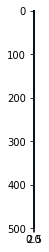

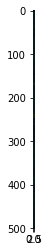

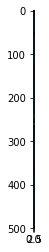

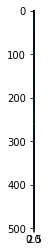

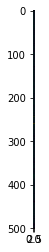

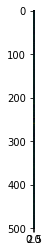

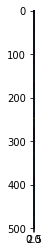

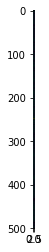

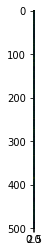

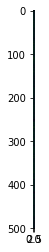

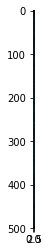

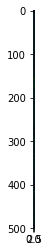

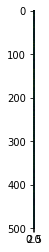

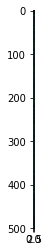

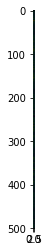

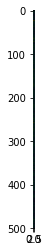

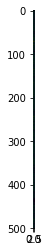

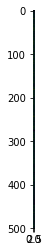

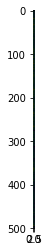

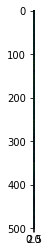

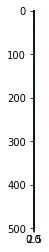

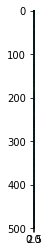

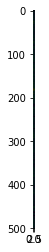

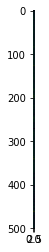

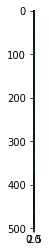

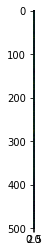

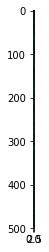

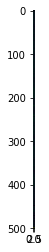

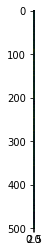

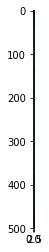

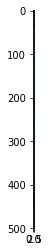

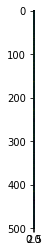

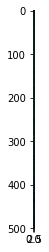

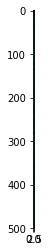

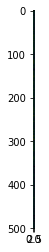

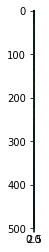

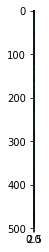

In [192]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()